# Experimental Analysis of a Telecom Churn Dataset #

### Load Libraries ###

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

### Let's load up the dataset and prepare the dataframe ###

In [4]:
churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

print("Column names:")
print(col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


### Let's see the top of the dataset  ###

In [3]:
churn_df.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
churn_df.describe(include='all')

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,352-4221,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [7]:
Churn_rate = (3333 - 2850) / 3333
print(Churn_rate)

0.14491449144914492


* Overall churn rate is about 15%.  

* We need to identify sizable groups of customers who we can offer a bonus plan to reduce the likelihood of churn.

In [12]:
sns.set(style="ticks", color_codes=True)

*There are four different accounting bins for phone usage and charges in the dataset.

* There are day, evening, night, and international bins for call charges, number of minutes, and number of calls.  

* Let's investigate the structure of this data by looking at the distributions. 

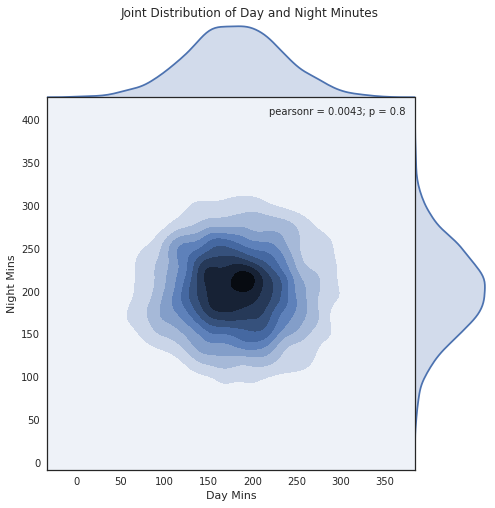

In [35]:
sns.set(style="white")
# Show the joint distribution using kernel density estimation

g = sns.jointplot(churn_df['Day Mins'],churn_df['Night Mins'], kind="kde", size=7, space=0)
plt.suptitle('Joint Distribution of Day and Night Minutes',fontsize=12,verticalalignment='bottom')
#plt.tight_layout()

plt.show()

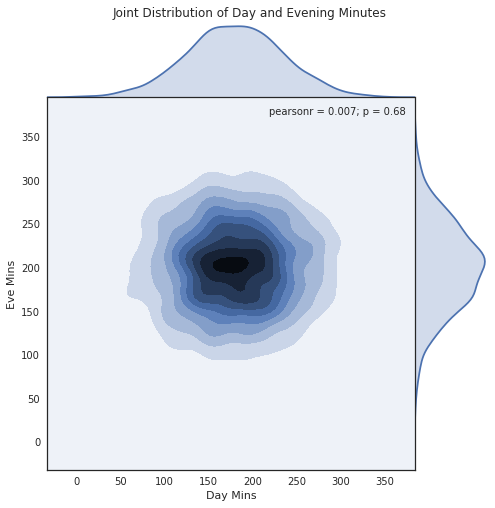

In [36]:
# Show the joint distribution using kernel density estimation

g = sns.jointplot(churn_df['Day Mins'],churn_df['Eve Mins'], kind="kde", size=7, space=0)
plt.suptitle('Joint Distribution of Day and Evening Minutes',fontsize=12,verticalalignment='bottom')
#plt.tight_layout()

plt.show()

* Joint distributions of Day and Evening minutes along with Day and Night minutes are each distributed unimodal Gaussian like distributions.

* While minutes and calls will be technically truncated Normal, assuming Gaussianity does not appear to be limiting.

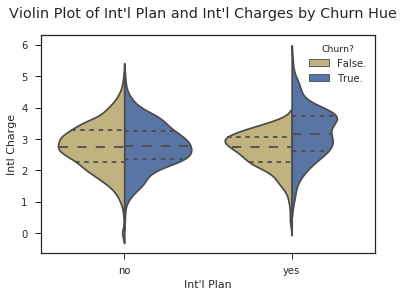

In [19]:
plt.suptitle("Violin Plot of Int'l Plan and Int'l Charges by Churn Hue")
sns.violinplot(x="Int'l Plan", y="Intl Charge", hue="Churn?", data=churn_df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})

* Those on the international calling plan who churn appear to have higher international calling charges

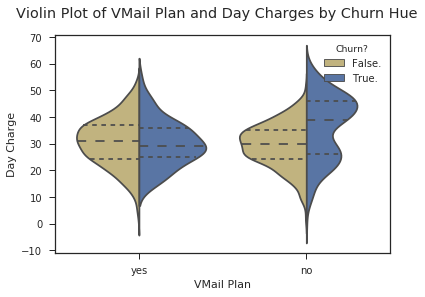

In [20]:
plt.suptitle("Violin Plot of VMail Plan and Day Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Day Charge", hue="Churn?", data=churn_df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})

* Those on the VMail plan who churn appear to have higher day calling charges. 

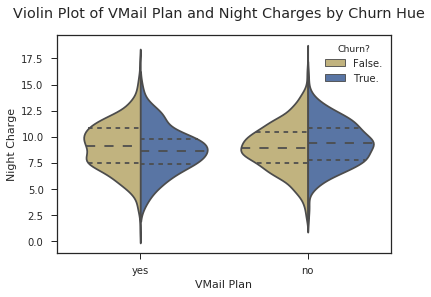

In [21]:
plt.suptitle("Violin Plot of VMail Plan and Night Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Night Charge", hue="Churn?", data=churn_df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})

* There appear to be no interactions between churning, VMail plan and night calling charges.

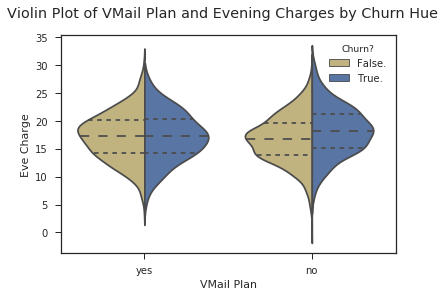

In [22]:
plt.suptitle("Violin Plot of VMail Plan and Evening Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Eve Charge", hue="Churn?", data=churn_df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})

* There appear to be no great interactions between churning, VMail plan and evening calling charges.

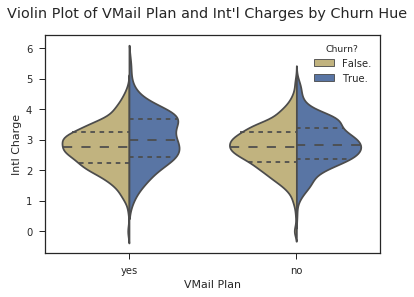

In [23]:
plt.suptitle("Violin Plot of VMail Plan and Int'l Charges by Churn Hue")
sns.violinplot(x="VMail Plan", y="Intl Charge", hue="Churn?", data=churn_df, split="true", inner="quart", palette={"True.": "b", "False.": "y"})

* Likewise for international calling charges.

In [12]:
to_keep1 = ["Churn?","Eve Charge", "Day Charge", "Night Charge", "Intl Charge"]
new_df1 = churn_df[to_keep1]

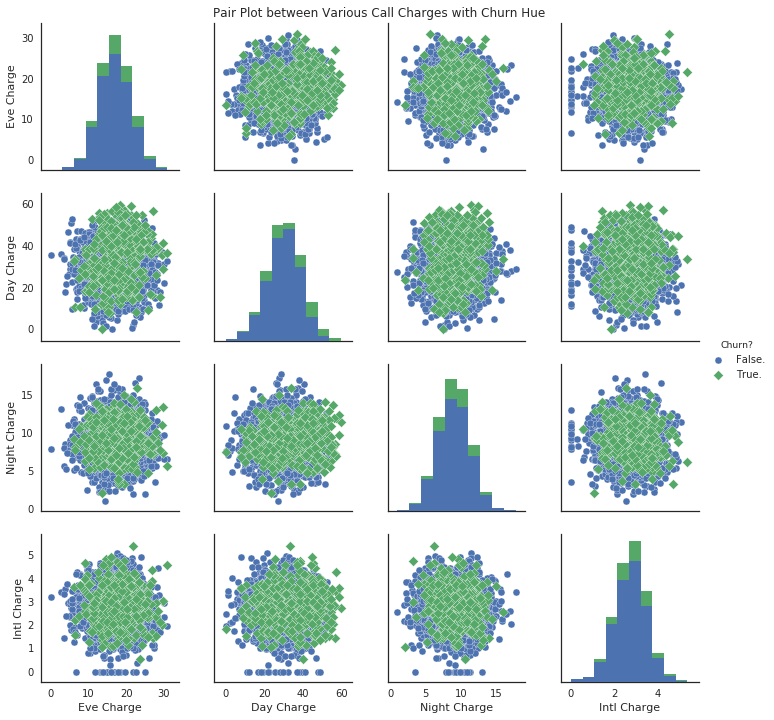

In [39]:
sns.pairplot(new_df1, hue="Churn?", markers=["o", "D"])
plt.suptitle('Pair Plot between Various Call Charges with Churn Hue',fontsize=12,verticalalignment='bottom')

plt.show()

* There is no obvious relationship between churn and the separate phone time usage charges.

Let's add all charges together to get a total revenue figure for each customer.

In [6]:
churn_df['revenue'] = churn_df['Day Charge'] + churn_df['Eve Charge'] + churn_df['Night Charge'] + churn_df['Intl Charge']

Now let's look at number of customer service calls.  It would seem likely that customers that churn will call many times into customer service.

In [38]:
to_keep2 = ["Churn?", "revenue", "CustServ Calls"]
new_df2 = churn_df[to_keep2]

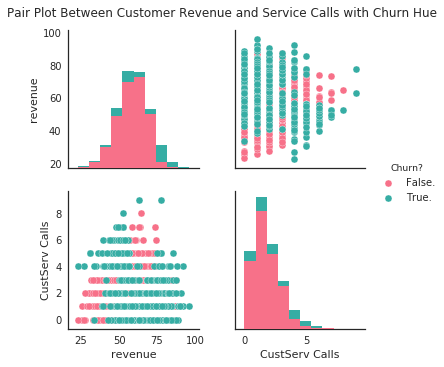

In [42]:
sns.pairplot(new_df2, hue="Churn?",palette="husl")
plt.suptitle('Pair Plot Between Customer Revenue and Service Calls with Churn Hue',fontsize=12,verticalalignment='bottom')
plt.show()

* It appears that customers who are high revenue and only modestly use the customer service line (< 4 times) mostly churn

* Individuals who use the customer service line many times ( > 3 times) but have lower than average revenue tend to churn



In [44]:
churn_df.groupby(['CustServ Calls']).mean()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,revenue
CustServ Calls,,,,,,,,,,,,,,,,
0,101.302726,436.912482,8.143472,181.835438,100.899570,30.912669,201.015352,100.100430,17.086585,202.219369,99.503587,9.100014,10.387231,4.444763,2.805036,59.904304
1,101.779848,435.257409,8.433531,179.454953,101.052498,30.507832,202.418459,100.130398,17.205724,200.163929,100.490262,9.007392,10.149111,4.542760,2.740821,59.461770
2,99.225296,437.108037,8.291173,176.753755,99.264822,30.048775,200.319368,100.387352,17.027404,200.945982,101.432148,9.042648,10.277339,4.475626,2.775415,58.894242
3,101.433566,442.417249,6.825175,183.316550,99.916084,31.164126,198.023776,98.811189,16.832238,202.284382,99.002331,9.102844,10.137063,4.503497,2.737366,59.836573
4,102.662651,439.024096,7.500000,184.272289,101.777108,31.326807,202.070482,102.096386,17.175964,199.100602,97.168675,8.959699,10.222892,4.301205,2.760904,60.223373
5,102.560606,438.090909,7.257576,175.359091,99.515152,29.811970,198.089394,101.469697,16.838030,191.943939,97.727273,8.638333,10.586364,4.424242,2.858636,58.146970
6,90.181818,439.000000,12.909091,151.009091,97.363636,25.671818,197.072727,92.136364,16.751818,202.186364,99.590909,9.098636,10.050000,3.318182,2.714091,54.236364
7,116.111111,423.222222,7.666667,156.011111,88.111111,26.522222,218.644444,107.666667,18.584444,202.055556,110.444444,9.092222,9.800000,4.666667,2.645556,56.844444
8,83.500000,459.000000,20.000000,180.300000,120.500000,30.650000,200.900000,107.500000,17.075000,195.000000,99.000000,8.775000,8.150000,6.000000,2.200000,58.700000


In [56]:
cust4_df = new_df2[new_df2['CustServ Calls'] >= 4]
cust3_df = new_df2[new_df2['CustServ Calls'] == 3]
cust2_df = new_df2[new_df2['CustServ Calls'] == 2]
cust1_df = new_df2[new_df2['CustServ Calls'] == 1]
cust0_df = new_df2[new_df2['CustServ Calls'] == 0]

In [57]:
cust4_df.describe(include='all')

,Churn?,revenue,CustServ Calls
count,267,267.000000,267.000000
unique,2,NaN,NaN
top,True.,NaN,NaN
freq,138,NaN,NaN
mean,NaN,59.167640,4.580524
std,NaN,10.849821,0.923826
min,NaN,22.930000,4.000000
25%,NaN,52.400000,4.000000
50%,NaN,58.220000,4.000000
75%,NaN,65.480000,5.000000


In [52]:
cust3_df.describe(include='all')

,Churn?,revenue,CustServ Calls
count,429,429.000000,429.0
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,385,NaN,NaN
mean,NaN,59.836573,3.0
std,NaN,10.311987,0.0
min,NaN,31.340000,3.0
25%,NaN,52.870000,3.0
50%,NaN,60.190000,3.0
75%,NaN,67.120000,3.0


In [53]:
cust2_df.describe(include='all')

,Churn?,revenue,CustServ Calls
count,759,759.000000,759.0
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,672,NaN,NaN
mean,NaN,58.894242,2.0
std,NaN,10.178406,0.0
min,NaN,27.770000,2.0
25%,NaN,52.095000,2.0
50%,NaN,58.360000,2.0
75%,NaN,65.805000,2.0


In [54]:
cust1_df.describe(include='all')

,Churn?,revenue,CustServ Calls
count,1181,1181.000000,1181.0
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,1059,NaN,NaN
mean,NaN,59.461770,1.0
std,NaN,10.474178,0.0
min,NaN,25.870000,1.0
25%,NaN,52.480000,1.0
50%,NaN,59.630000,1.0
75%,NaN,66.120000,1.0


In [55]:
cust0_df.describe(include='all')

,Churn?,revenue,CustServ Calls
count,697,697.000000,697.0
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,605,NaN,NaN
mean,NaN,59.904304,0.0
std,NaN,10.870004,0.0
min,NaN,23.250000,0.0
25%,NaN,52.510000,0.0
50%,NaN,60.560000,0.0
75%,NaN,67.070000,0.0


In [59]:
rev70  = new_df2[new_df2['revenue'] >= 70]
rev55  = new_df2[(new_df2['revenue'] >= 55) & (new_df2['revenue'] < 70)]
lowrev = new_df2[new_df2['revenue'] < 55] 

In [60]:
rev70.describe(include='all')

,Churn?,revenue,CustServ Calls
count,527,527.000000,527.000000
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,302,NaN,NaN
mean,NaN,75.463681,1.559772
std,NaN,4.588590,1.340980
min,NaN,70.000000,0.000000
25%,NaN,71.980000,1.000000
50%,NaN,74.410000,1.000000
75%,NaN,77.720000,2.000000


In [61]:
rev55.describe(include='all')

,Churn?,revenue,CustServ Calls
count,1702,1702.000000,1702.000000
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,1589,NaN,NaN
mean,NaN,61.944624,1.542303
std,NaN,4.137537,1.283563
min,NaN,55.030000,0.000000
25%,NaN,58.367500,1.000000
50%,NaN,61.745000,1.000000
75%,NaN,65.250000,2.000000


In [62]:
lowrev.describe(include='all')

,Churn?,revenue,CustServ Calls
count,1104,1104.000000,1104.000000
unique,2,NaN,NaN
top,False.,NaN,NaN
freq,959,NaN,NaN
mean,NaN,47.959167,1.596014
std,NaN,5.697932,1.351881
min,NaN,22.930000,0.000000
25%,NaN,44.927500,1.000000
50%,NaN,49.420000,1.000000
75%,NaN,52.310000,2.000000


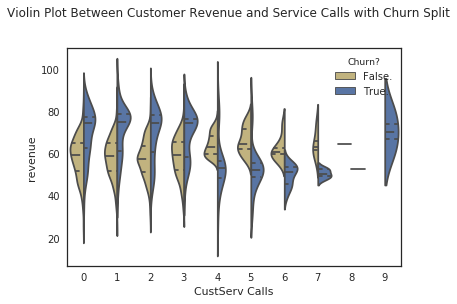

In [63]:

sns.violinplot(x="CustServ Calls", y="revenue", hue="Churn?", data=new_df2, split="true", inner="quart", palette={"True.": "b", "False.": "y"})
plt.suptitle('Violin Plot Between Customer Revenue and Service Calls with Churn Split',fontsize=12,verticalalignment='bottom')
plt.show()

* We can see some of the issues very clearly in this graphic

* Many of our best customers are churning

* Many customers churn who call customer service alot but they tend to have lower revenue.

<center> <h2> Summary of Churn Rate by Revenue Cohort </h2></center>



Revenue Cohort | Churn Rate
-------------- | ----------------
  >= 70 | 42.7%
Between 55 and 70  | 6.6%
  < 55      | 13.3%




* The churn rate of high valued customers (top quartile revenue) is astoundingly high.

* There appears to be a band of good customers ( middle of the road revenue) who churn less than average.

* Low revenue customers also tend to churn only at average rates.

* Revenue appears to be an excellent predictor of churn by itself.

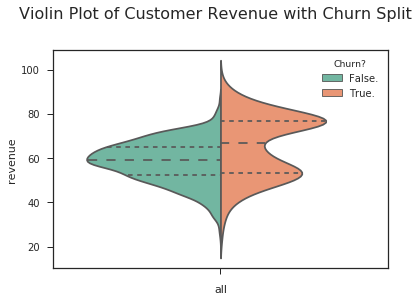

In [19]:
churn_df["all"] = ""
sns.violinplot(x="all",y="revenue", hue="Churn?", data=churn_df, split="true", inner="quart",palette="Set2")
plt.suptitle('Violin Plot of Customer Revenue with Churn Split',fontsize=16,verticalalignment='bottom')
plt.show()

* The bimodal revenue distribution of churners is apparent in this graphic.

* The top quartile of all revenue earners will churn.

* There is also a large group of lower quartile revenue earners who will churn.

In [21]:
churn_df["calls"] = churn_df['CustServ Calls']>=4

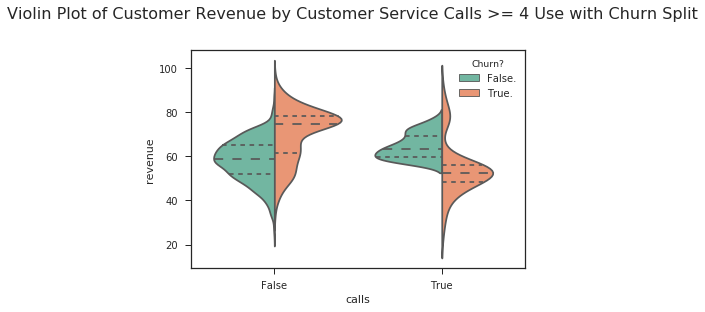

In [23]:
sns.violinplot(x="calls",y="revenue", hue="Churn?", data=churn_df, split="true", inner="quart",palette="Set2")
plt.suptitle('Violin Plot of Customer Revenue by Customer Service Calls >= 4 Use with Churn Split',fontsize=16,verticalalignment='bottom')
plt.show()

## Summary Data Analysis ##

We first did a data summary of the churn dataframe.  Our target is to understand how the explanatory features (call amounts in various time bins) impacts whether customers of the telco will churn. The telcos customers have a choice of joining a VMail and International calling plan.  The number of VMail messages and call minutes (also number of calls and total charge) are tallied by Day, Night, Evening and International groupings.  We also have the number of customer service calls each customers has made.

Revenue of customers (total charges of all types) was tallied.  The best revenue earners appear to have almost a 50% chance of churning.  This is far greater than the overall 15% churn rate.  There is also a lower than average revenue group of **Complainers** ( customer service calls > 3) who tend to churn.

My recommendation from this data analysis is the creation of two separate programs for customer retention.  

* We should create a low cost cut rate discount phone plan to engender loyalty in aggrieved (high customer service calling) customers.

* A higher cost loyalty program should be created for the higher revenue customers.

# The Experimentation RFC #

## The Problem ##

We have been tasked by a major telecom company (a provider of long-distance phone service) to come up with a plan to minimize customer churn.  Churn is where customers leave a subscription plan or simply stop responding or using a service that is not on a subscription basis.  In order to help with this analysis, we have a dataset of 3333 individuals.  Over 480 individuals have churned (quit the phone plan).  This amounts to an overall 14.5% churn rate.  The company finds this rate much too high and would like data analysis to reveal an actionable plan to reduce churn. Customer churn is, in general, very costly for companies.  New customer acquisition is between 5 and 20 times as expensive as retaining existing customers.

## The Potential Solution ##

* The data analysis detailed above has shown that our highest revenue customers have a greatly increased chance of churn.

* We must begin a loyalty program for our high revenue (revenue > 70) customers.

* The second group of customers that are most in danger of churning are those customers that call to customer service over 3 times.

* We believe that starting a lower cost free minute bonus plan could help retain the small percentage (<10%) of customers who call the customer service line over 3 times.  There are not many of these customers but any decrease in churn will help our bottom line.

## The method of testing the solution ##